# DATA VISULAIZATION AND MULTICOLLINEARITY DETECTION EXERCISE

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

# Problem: The Boston House Pricing

## Dataset Description

Scikit-learn toy datasets: scikit-learn package of Python comes with a few small standard datasets that do not require to download any file from some external website.
https://scikit-learn.org/stable/datasets/toy_dataset.html

This Boston House Pricingdata has been taken from a reaserch paper, which can be found at 
[Source: Original research paper](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y)

## Loading Data

In [2]:
#loading the dataset from sklearn.
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Creating Dataframe

In [3]:
#Let us create a dataframe from the two ndarrays 'data' and 'target' from boston_dataset.
dataset = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)
#Add column with the price (target).
dataset['PRICE'] = boston_dataset.target
#let's see the dataframe we have created.
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Visualising Data - Histograms and Distributions

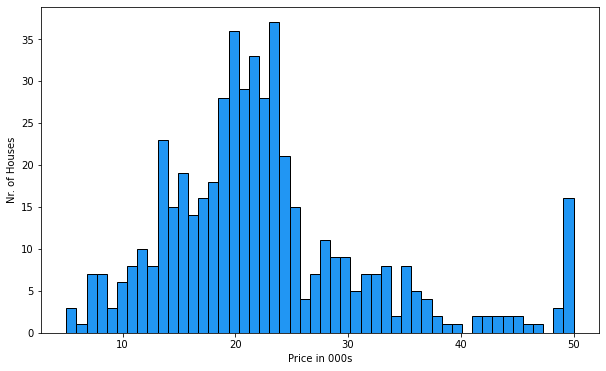

In [4]:
#Let us draw histograms for different features. 
#Recall that a histigram is a plot of frequencies of different values in a feature against these values. 
#We will use method hist of the package matplotlib for this purpose.

#Let us first see the distribution of the target, which is the house price.
plt.figure(figsize=(10, 6))
plt.hist(dataset['PRICE'], bins=50, ec='black', color='#2196f3')
#Here we randomly selected 50 bins, price is a continuous variable here. 
#You can use the method dataset['PRICE'].value_counts() to see the distinct values in this column.
#This attribute bin can also be skipped, in that case matplotlib selects an appropriate number of bins by itself.
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Houses')
plt.show()

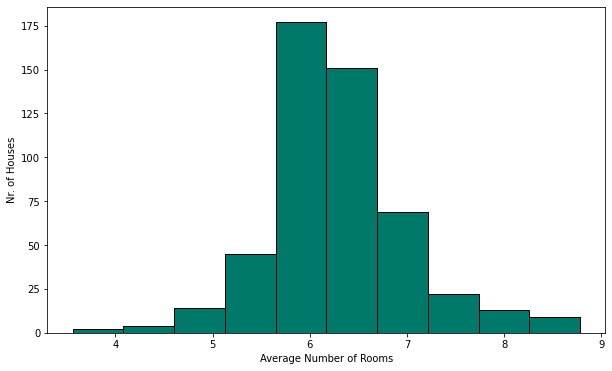

In [5]:
#Now let us see distribution of RM which is the avarage number of rooms in the area.
#This again is a continuous variables. We are not specifying number of  bins here, letting matplotlib decide for itself.
plt.figure(figsize=(10, 6))
plt.hist(dataset['RM'], ec='black', color='#00796b')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

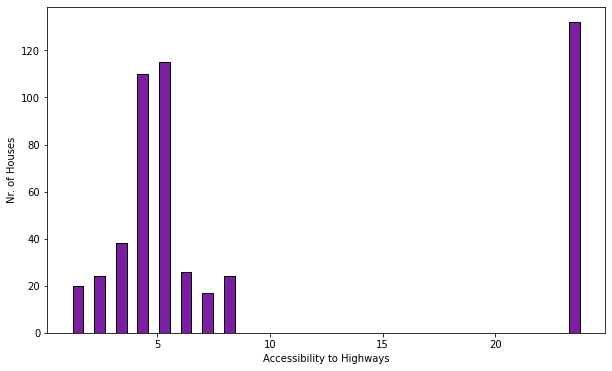

In [6]:
#Now let us see distribution of RAD which indicates the index of accessibilty to highways.
plt.figure(figsize=(10, 6))
plt.hist(dataset['RAD'], bins=24, ec='black', color='#7b1fa2', rwidth=0.5)
plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

In [7]:
#TASK FOR YOU
dataset['CHAS'].value_counts()
#Run the above statement and then plot histogram for this feature CHAS which shows if the house is situated near Charle' River.

0.0    471
1.0     35
Name: CHAS, dtype: int64

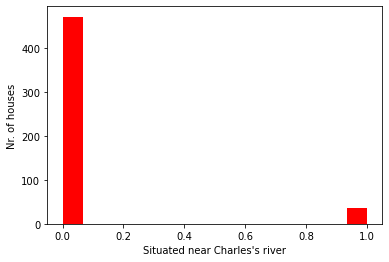

In [11]:
fig,ax= plt.subplots()
ax.hist(dataset['CHAS'], color='red', bins=15)
ax.set_xlabel('Situated near Charles\'s river')
ax.set_ylabel('Nr. of houses')
plt.show()

## Correlation

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [12]:
#corr is the method in pandas which can directly find correlation between two quantities.
#Let us find the correlation between PRICE (target) and RM (feature).
dataset['PRICE'].corr(dataset['RM'])
#The resulting value shows moderate positive correlation

0.695359947071539

In [13]:
#Similarly let us find the correlation between PRICE (target) and PTRATIO (feature).
dataset['PRICE'].corr(dataset['PTRATIO'])
#This shows moderate negavtive correlation

-0.5077866855375615

In [14]:
#Now let us find all correlation coefficients at once
dataset.corr()
#Here observe that correlation between INDUS and DIS is quite high and may cause multicollinearity.
#Also note that the values are same both ways, i.e. ZN and CRIME is same as CRIME and ZN.
#So upper right diagonal is same as lower left diagonal.
#Also note that correlation of a variable with itself is always 1.

#Notice that finding higher values in this dense map is difficult, there is an easier way to do this - by using a heatmap.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


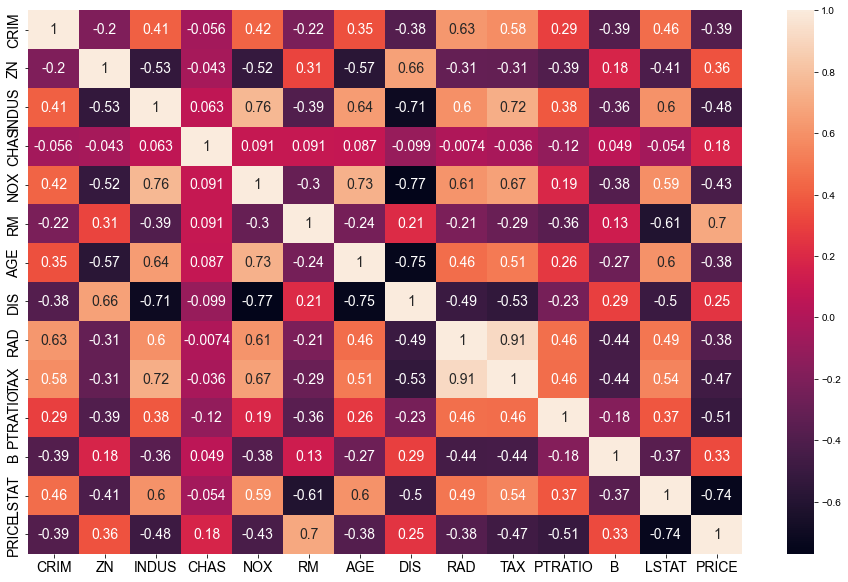

In [15]:
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
#The color bar on the right side is the key.

#Generating a heatmap for all correlation coefficients. 
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Visualizing Correlation Through Scatter Plot

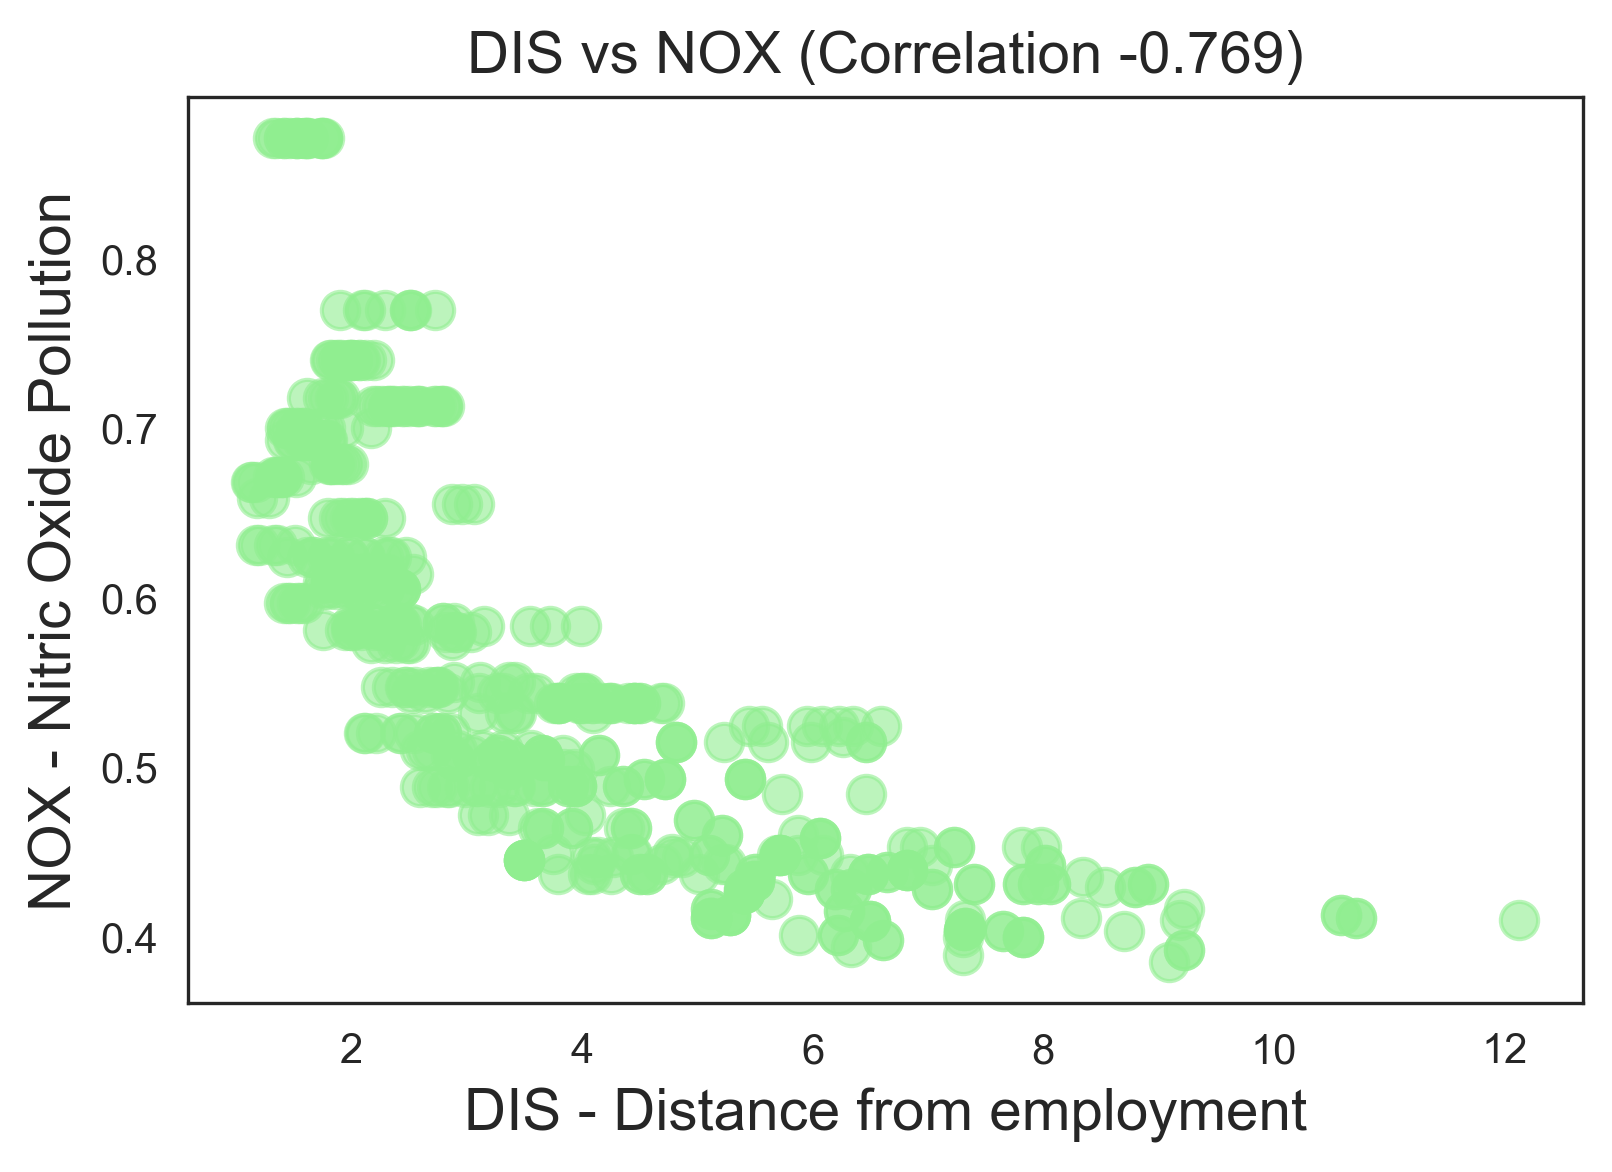

In [16]:
#Let us create scatterplot between NOX and DIS to visualize correlation.

#Let us print the correlation found from corr method too in the heading to verify the results.
nox_dis_corr = round(dataset['NOX'].corr(dataset['DIS']), 3)

plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(x=dataset['DIS'], y=dataset['NOX'], alpha=0.6, s=80, color='lightgreen')
plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS - Distance from employment', fontsize=14)
plt.ylabel('NOX - Nitric Oxide Pollution', fontsize=14)
plt.show()
#The plot shows quite strong neagtive correlation between the two features.

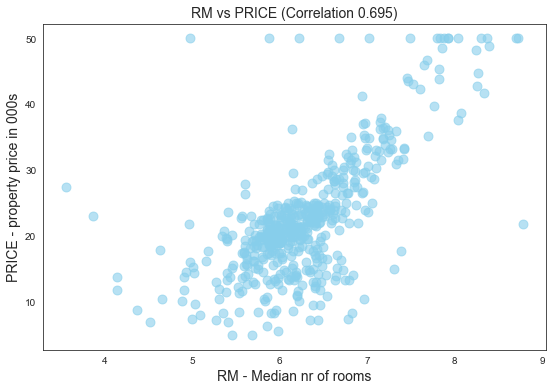

In [17]:
#Another scatter plot between RM and PRICE.
rm_tgt_corr = round(dataset['RM'].corr(dataset['PRICE']), 3)
plt.figure(figsize=(9, 6))
plt.scatter(x=dataset['RM'], y=dataset['PRICE'], alpha=0.6, s=80, color='skyblue')
plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM - Median nr of rooms', fontsize=14)
plt.ylabel('PRICE - property price in 000s', fontsize=14)
plt.show()

### The PairPlot
- This is a method of seaborn package, which can be used to see all the scatterplots as well as histograms at once.
- The diagonal plots are histograms.

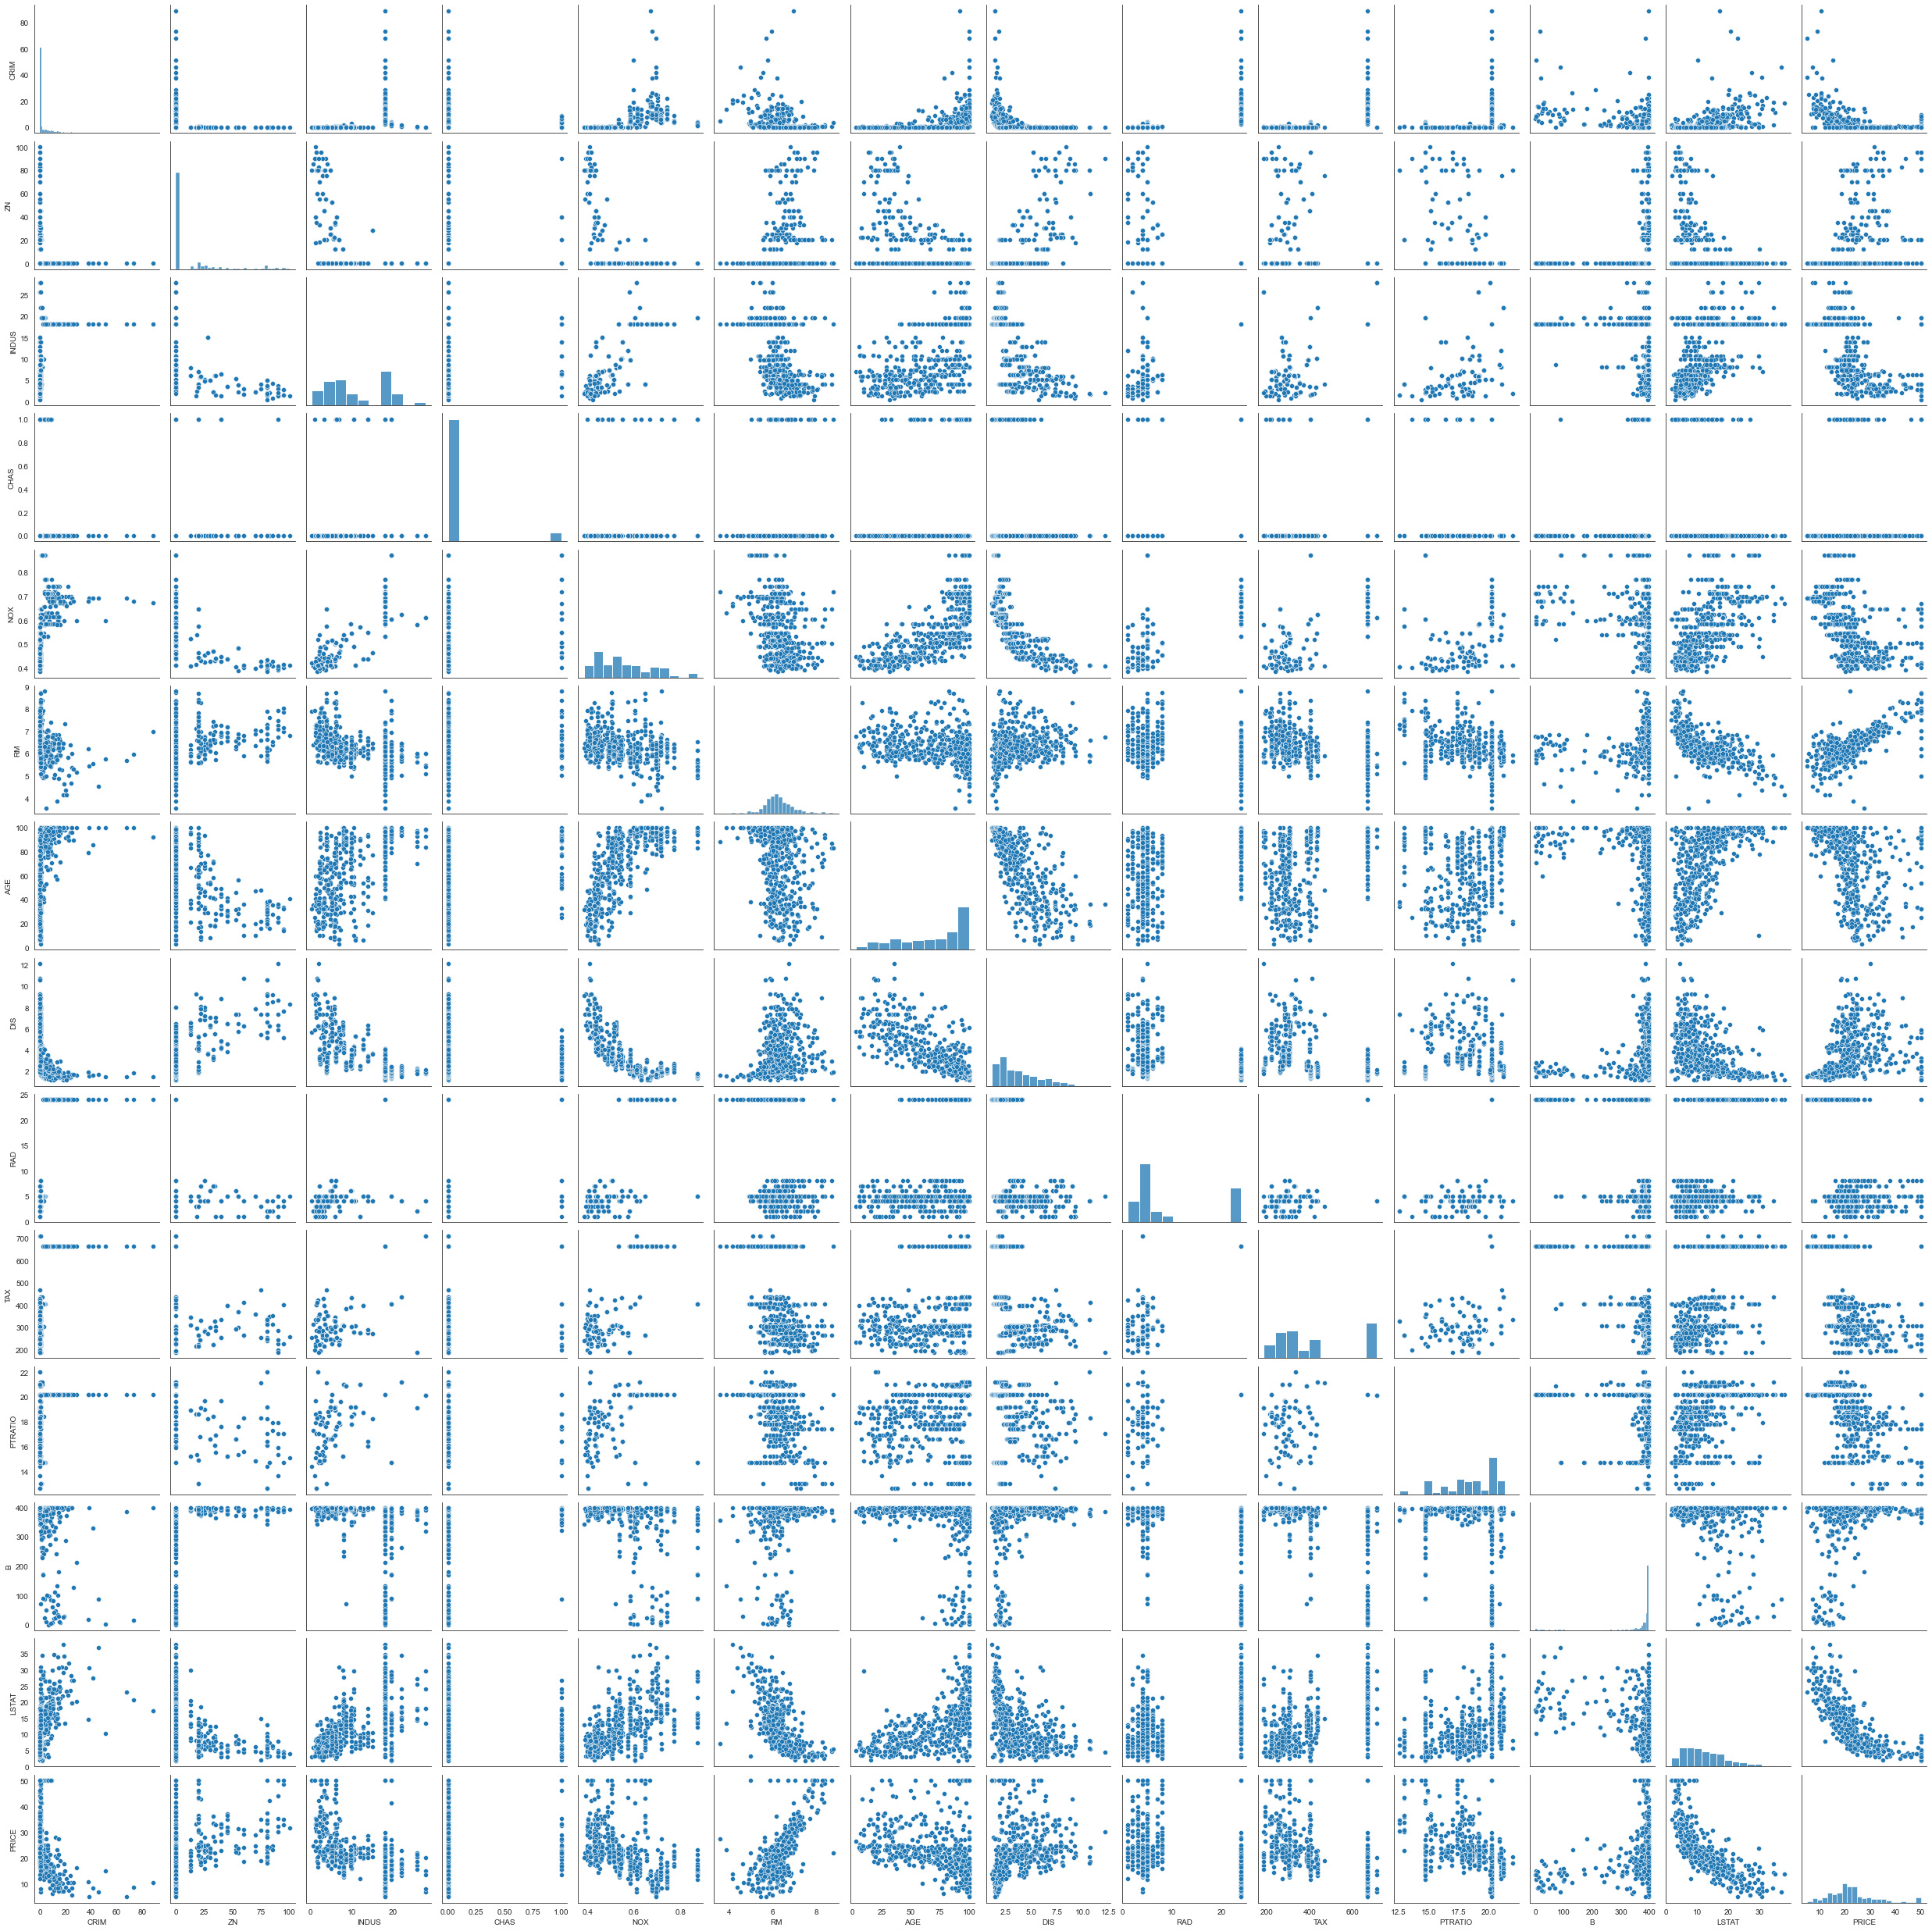

Wall time: 34.3 s


In [19]:
%%time 
#This time is a magic function of notebook, used to find the execution time of a piece of code.
#Since generation of pairplot will take some time, let us measure it using this magic function.
#It will print the wall time in the end.

#Generating pairplot - all correlation plots at once
sns.pairplot(dataset)
plt.show()